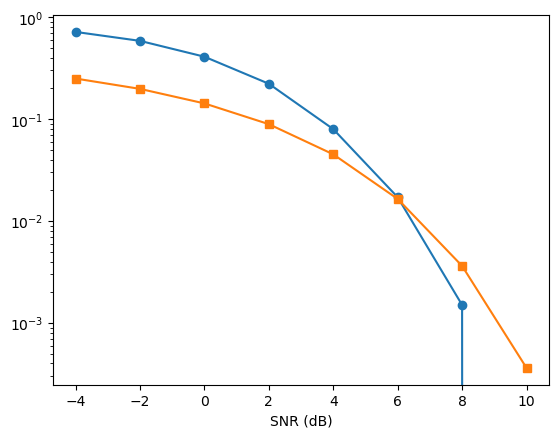

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the generator matrix for a (7, 4) block code
G = np.array([[1, 0, 0, 0, 1, 1, 1],
              [0, 1, 0, 0, 1, 1, 0],
              [0, 0, 1, 0, 1, 0, 1],
              [0, 0, 0, 1, 0, 1, 1]])

# Define the parity-check matrix for the same (7, 4) block code
H = np.array([[1, 1, 1, 0, 1, 0, 0],
              [1, 1, 0, 1, 0, 1, 0],
              [1, 0, 1, 1, 0, 0, 1]])

# Define the signal-to-noise ratio (SNR) range to simulate
SNRdBs = np.arange(-4, 12, 2)
SNRs = 10**(SNRdBs/10.0)

# Define the number of simulation runs
num_runs = 10000

# Define a function to generate a random message of length k
def generate_message(k):
    return np.random.randint(2, size=k)

# Define a function to encode a message using the generator matrix
def encode_message(message):
    return np.mod(np.dot(message, G), 2)

# Define a function to add AWGN to a codeword
def add_awgn(codeword, SNR):
    result = [1 if x == 1 else -1 for x in codeword]
    N0 = 1/SNR
    noise = np.random.normal(0, math.sqrt(N0/2), len(codeword)) # 평균이 0이고, 표준편차가 sqrt(노이즈의 분산)인 정규분표를 따르는 노이즈
    return  result + noise

def map_array(arr):
    return np.where(arr < 0, 0, 1)

# Define a function to decode a received word using the parity-check matrix
def decode_word(float_r):
    received = map_array(float_r)
    syndrome = np.mod(np.dot(H, received), 2)
    if np.count_nonzero(syndrome) == 0:
        return received[:4]
    else:
        for i in range(len(H)):
            if np.array_equal(syndrome, H.T[i,:]):
                received[i] = (received[i]+1)%2
                break
        return decode_word(received)

# Define a function to simulate the transmission and decoding of a message
def simulate_message(SNR):
    message = generate_message(4)
    codeword = encode_message(message)
    float_r = add_awgn(codeword, SNR)
    decoded = decode_word(float_r)
    return np.array_equal(message, decoded) #맞으면 1을 반환

# Simulate the transmission and decoding of messages for each SNR value
simulated_p_error = []
for SNR in SNRs:
    num_errors = 0
    for i in range(num_runs):
        if not simulate_message(SNR):
            num_errors += 1
    simulated_p_error.append(num_errors/num_runs)

# Compute the theoretical codeword error probability
EbNo = SNRs*4/7
theory_p_error = [0,0,0,0,0,0,0,0]
for i in range(8):
    theory_p_error[i] = 0.5*math.erfc(math.sqrt(EbNo[i]))

# Plot the results
plt.semilogy(SNRdBs, simulated_p_error, 'o-', label='Simulated')
plt.semilogy(SNRdBs, theory_p_error, 's-', label='Theoretical')
plt.xlabel('SNR (dB)')
plt.show()